# Exercise 1

![Alternative_text](e1_answer1.jpeg)

![Alternative_text](e1_answer2.jpg)

![Alternative_text](e1_answer3.jpeg)

# Exercise 2

In [1]:
# Set up
from pylab import *
import math

In [2]:
def calc_diff_2p(f, x, h):
    return (f(x + h) - f(x)) / h

def calc_diff_3p(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def calc_diff_4p(f, x, h):
    return (6 * f(x + h) - 2 * f(x - h) - 3 * f(x) - f(x + 2 * h)) / (6 * h)

def calc_diff_5p(f, x, h):
    return (f(x - 2*h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

In [3]:
x = 0
e_to_x = lambda x : math.e ** x
correct_diff = e_to_x(x)
i = range(1, 76)
h = [10 ** (-t / 5) for t in i]
direvatives = [calc_diff_2p(f = e_to_x, x = x, h = t) for t in h]
direvatives_3p = [calc_diff_3p(f = e_to_x, x = x, h = t) for t in h]
direvatives_4p = [calc_diff_4p(f = e_to_x, x = x, h = t) for t in h]
direvatives_5p = [calc_diff_5p(f = e_to_x, x = x, h = t) for t in h]

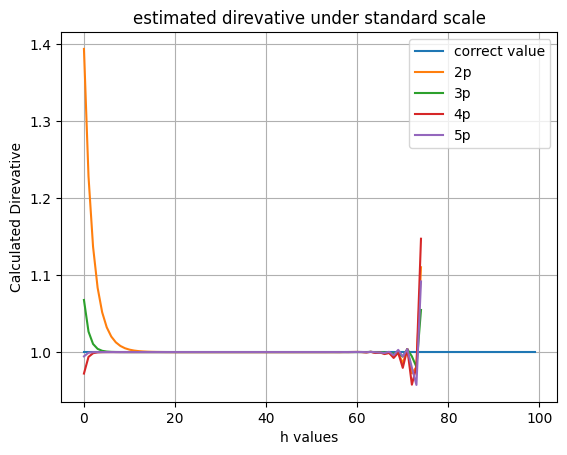

In [4]:
# Draw everything

line_values = linspace(0, 70, 100)  # Generates 100 points between -10 and 10

# Create a list of y-values where each y-value is the constant
correct_values = [correct_diff] * len(line_values)

plot(correct_values)


plot(direvatives)
plot(direvatives_3p)
plot(direvatives_4p)
plot(direvatives_5p)
# plot(correct_diff, marker='s', linestyle='--', color='r', label='Line 2') 
legend(['correct value', '2p', '3p', '4p', '5p'])

title('estimated direvative under standard scale')
xlabel('h values')
ylabel('Calculated Direvative')

# Add grid lines
grid(True)

# Show the plot
show()

In [5]:
errors_2p = [abs(direvative - 1) for direvative in direvatives]
errors_3p = [abs(direvative - 1) for direvative in direvatives_3p]
errors_4p = [abs(direvative - 1) for direvative in direvatives_4p]
errors_5p = [abs(direvative - 1) for direvative in direvatives_5p]

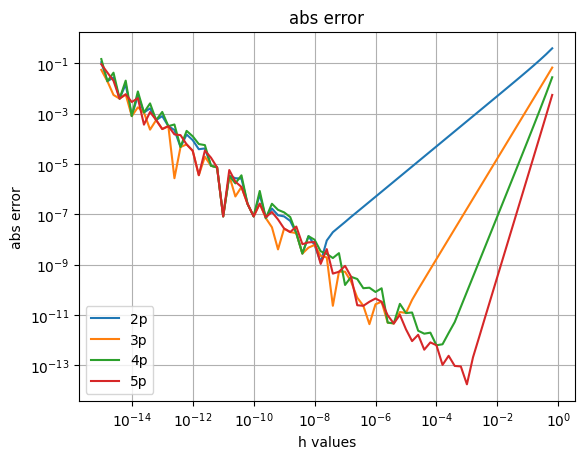

In [6]:
loglog(h, errors_2p,label='2 p')
loglog(h, errors_3p,label='3 p')
loglog(h, errors_4p,label='4 p')
loglog(h, errors_5p,label='5 p')

title('abs error')
xlabel('h values')
ylabel('abs error')

legend(['2p', '3p', '4p', '5p'])
grid(True)
show()

# Exercise 3

From Exercise 1, we know Newton's interpolation polynomial with four points is

\begin{align*}
p_{3}( y) =f[ x_{1}] +f[ x_{1}x_{2}] ( y-x_{1}) +f[ x,x_{2}x_{3}] (y-x)(y-x_{2}) +f[ x_{1}x_{2}x_{3}x_{4}] (y-x_{1})(y-x_{2}) (y-x_{3}) 
\end{align*}

If we take the third direvative of $p_3$, we got


\begin{align*}
p^{(3)}_{3} &= 3!f[ x_{1}x_{2}x_{3}x_{4}] \\
        &= 6f[ x_{1}x_{2}x_{3}x_{4}] \\
        &= 6 \cdot \frac{2f( x_{4}) -6f( x_{3}) -2f( x_{2}) +6f( x_{1}) }{12h^{3}} \\
&=\frac{f( x_{4}) -3f( x_{3}) -f( x_{2}) + 3f( x_{1})
}{h^{3}}
\end{align*}


,where


\begin{align*}
x_1 &= x \\
x_2 &= x - h \\
x_3 &= x + h \\
x_4 &= x + 2h\\
\end{align*}

Thus
\begin{align*}
p^{(3)}_{3} &= 3!f[ x_{1}x_{2}x_{3}x_{4}] \\
        &= 6f[ x_{1}x_{2}x_{3}x_{4}] \\
        &= 6 \cdot \frac{2f( x_{4}) -6f( x_{3}) -2f( x_{2}) +6f( x_{1}) }{12h^{3}} \\
&=\frac{f( x_{4}) -3f( x_{3}) -f( x_{2}) + 3f( x_{1})
}{h^{3}} \\
&=\frac{f( x + 2h) -3f( x + h) -f( x - h ) + 3f( x)
}{h^{3}}
\end{align*}

Let's typlor expand $f(x + \frac{h}{2})$, we got

\begin{align*}
f(x+\frac{1}{2}h) =f(x) +\frac{1}{2}hf'(x) +\frac{h^{2}}{2^{2}2!}f''(x) +\frac{h^{3}}{2^{3}3!}f^{(3)}(x) +\frac{h^{4}}{2^{4}4!}f^{(4)}(c) 
\end{align*}

where $c \in (x, x + \frac{h}{2})$

Let's also expand $f(x)$, $f(x + h)$, $f(x - h)$, $f(x + 2h)$ about $x$,
we got

\begin{align*}
f( x-h) &=f( x) -hf'( x) +\frac{h^{2}}{2!}f''( x) -\frac{h^{3}}{3!}f^{( 3) }( x) +\frac{h^{4}}{4!}f^{( 4) }( c_3) \\
f(x) &= f(x) \\
f( x+h) &=f( x) +hf'( x) +\frac{h^{2}}{2!}f''( x) +\frac{h^{3}}{3!}f^{( 3) }( x) +\frac{h^{4}}{4!}f^{( 4) }( c_2) \\
f( x+2h) &=f( x) +2hf'( x) +\frac{(2h)^{2}}{2!}f''( x) +\frac{(2h)^{3}}{3!}f^{( 3) }( x) +\frac{(2h)^{4}}{4!}f^{( 4) }( c_4) \\
\end{align*}



Thus,
\begin{align*}
f(x+2h) -3f(x+h) - f(x-h) + 3f(x) = \frac{f^{(3)}(x)}{h^3}+h^4(\frac{2}{3}f^{(4)}(c_4)-\frac{1}{8}f^{(4)}(c_2)-\frac{1}{24}f^{(4)}(c_3))
\end{align*}

where
$c_4 \in (x, 2h) c_2 \in (x, h), c_3 \in (x-h, x)$, all of which converges to a constant as $h \rightarrow 0$

Thus,
\begin{align*}
f(x+2h) -3f(x+h) - f(x-h) + 3f(x) = \frac{f^{(3)}(x)}{h^3}+C \cdot h^4
\end{align*}
, where
\begin{align*}
C = \lim_{h \rightarrow 0}(\frac{2}{3}f^{(4)}(c_4)-\frac{1}{8}f^{(4)}(c_2)-\frac{1}{24}f^{(4)}(c_3))
\end{align*}

Thus, according previous calculation, we have
\begin{align*}
f^{(3)}(x) = \frac{f(x+2h) -3f(x+h) - f(x-h) + 3f(x)}{h^3} = f^{(3)}(x)+C \cdot h
\end{align*},
which means the error is $O(h)$

We do a tylor expansion around $(x + \frac{h}{2})$ and get:

\begin{align}
f( x+2h) &=f( x + \frac{h}{2}) +\frac{3h}{2}f'( x + \frac{h}{2}) +\frac{(\frac{3h}{2})^2}{2!}f''( x + \frac{h}{2}) +\frac{(\frac{3h}{2})^{3}}{3!}f^{(3)}( x + \frac{h}{2}) +\frac{(\frac{3h}{2})^{4}}{4!}f^{( 4) }( x + \frac{h}{2})+\frac{(\frac{3h}{2})^{5}}{5!}f^{( 5) }( a_1)
\\
 f(x+h)&= f( x + \frac{h}{2}) +\frac{h}{2}f'( x + \frac{h}{2}) +\frac{(\frac{h}{2})^2}{2!}f''( x + \frac{h}{2}) +\frac{(\frac{h}{2})^{3}}{3!}f^{(3)}( x + \frac{h}{2}) +\frac{(\frac{h}{2})^{4}}{4!}f^{( 4) }( x + \frac{h}{2}) +\frac{(\frac{h}{2})^{5}}{5!}f^{( 5) }( a_2)
\\
f(x+\frac{1}{2}h) &=f( x+\frac{1}{2}h) 
\\
f(x) &=f( x + \frac{h}{2}) -\frac{h}{2}f'( x + \frac{h}{2}) +\frac{(\frac{h}{2})^2}{2!}f''( x + \frac{h}{2}) -\frac{(\frac{h}{2})^{3}}{3!}f^{(3)}( x + \frac{h}{2}) +\frac{(\frac{h}{2})^{4}}{4!}f^{( 4) }( x + \frac{h}{2}) - \frac{(\frac{h}{2})^{5}}{5!}f^{( 5) }( a_3)
\\
f(x-h) &=f( x + \frac{h}{2}) -\frac{3h}{2}f'( x + \frac{h}{2}) +\frac{(\frac{3h}{2})^2}{2!}f''( x + \frac{h}{2}) -\frac{(\frac{3h}{2})^{3}}{3!}f^{(3)}( x + \frac{h}{2}) +\frac{(\frac{3h}{2})^{4}}{4!}f^{( 4) }( x + \frac{h}{2}) - \frac{(\frac{3h}{2})^{5}}{5!}f^{( 5) }(a_4)
\\
\end{align}

, where $a_1 \in (x + \frac{h}{2}, x + 2h), a_2 \in (x + \frac{h}{2}, x + h), a_3 \in (x, x + \frac{h}{2}), a_4 \in (x - h, x + \frac{h}{2})$

After doing the same calculation: $(f(x+2h) -3f(x+h) - f(x-h) + 3f(x))$

We get


\begin{align}
f(x+2h) -3f(x+h) - f(x-h) + 3f(x) \\
=(\dfrac{9h^{3}}{2} - \frac{h^3}{2})f^{( 3) }( x + \frac{h}{2}) + h^5(
\frac{(\frac{3}{2})^{5}}{5!}f^{( 5) }(a_1)
-3 \frac{(\frac{1}{2})^{5}}{5!}f^{( 5) }( a_2)
-3 \frac{(\frac{1}{2})^{5}}{5!}f^{( 5) }( a_3)
+ \frac{(\frac{3h}{2})^{5}}{5!}f^{( 5) }(a_4)
)
\end{align}

Similarly, we got
\begin{align}
f(x+2h) -3f(x+h) - f(x-h) + 3f(x) = h^3f^{( 3) }( x + \frac{h}{2}) + A \cdot h^5
\end{align}
, where
\begin{align}
A = \lim_{(h \rightarrow 0)}(
\frac{(\frac{3}{2})^{5}}{5!}f^{( 5) }(a_1)
-3 \frac{(\frac{1}{2})^{5}}{5!}f^{( 5) }( a_2)
-3 \frac{(\frac{1}{2})^{5}}{5!}f^{( 5) }( a_3)
+ \frac{(\frac{3h}{2})^{5}}{5!}f^{( 5) }(a_4)
)
\end{align}

Thus,
\begin{align}
f^{( 3) }( x + \frac{h}{2}) = \frac{f(x+2h) -3f(x+h) - f(x-h) + 3f(x)}{h^3} - A \cdot h^2
\end{align}

Thus, the error is up to $O(h^2)$

## Explanation

When we are evaluate the direvative at $x$, we are essentially using a not symmetric approximation. Yet when we evaluate the direvative as $x + \frac{h}{2}$, we make the system a symmetric system. The symetric approximation has a higher order error but this error is relative to $x + \frac{h}{2}$. Also, $f(x + \frac{h}{2})$ is cancelled out when we are doing our calculation, just like when we are evluating $f'(x)$ at $x$ with $x-h, x, x+h$, we cancelled the $f(x)$ point

# Exercise 4

In [7]:
def tp_integral(f, N: int, a: int, b:int):
    area = 0
    for i in range(0, N + 1): # N + 1 excluded
        x_i = a + i * ((b - a) / N)
        x_i_next = a + (i + 1) * ((b - a) / N)
        h = (x_i_next - x_i)
        curr_a = (h / 2) * (f(x_i) + f(x_i_next))
        area += curr_a
    return area

In [8]:
def mp_integral(f, N:int, a:int, b:int):
    area = 0
    for i in range(0, N + 1): # N + 1 excluded
        x_i = a + i * ((b - a) / N)
        x_i_next = a + (i + 1) * ((b - a) / N)
        h = (x_i_next - x_i)
        curr_a = (h) * (f((x_i + x_i_next) / 2))
        area += curr_a
    return area

In [9]:
f_sin = lambda x : math.sin(x)

In [10]:
N_range = range(1, 1001)

In [11]:
N_range

range(1, 1001)

In [12]:
tp_result = [tp_integral(f_sin, i, 0, math.pi) for i in N_range]
mp_result = [mp_integral(f_sin, i, 0, math.pi) for i in N_range]
h_s = [math.pi / i for i in N_range]

In [13]:
error_tp = [abs(i - 2) for i in tp_result]
error_mp = [abs(i - 2) for i in mp_result]

In [14]:
error_tp[:5], error_mp[:5]

([2.0,
  1.2146018366025513,
  0.6396504768243363,
  0.3815612856978581,
  0.25089258495624045],
 [2.0,
  0.8892792654604085,
  0.4292036732051028,
  0.2482145589881113,
  0.16087962694644253])

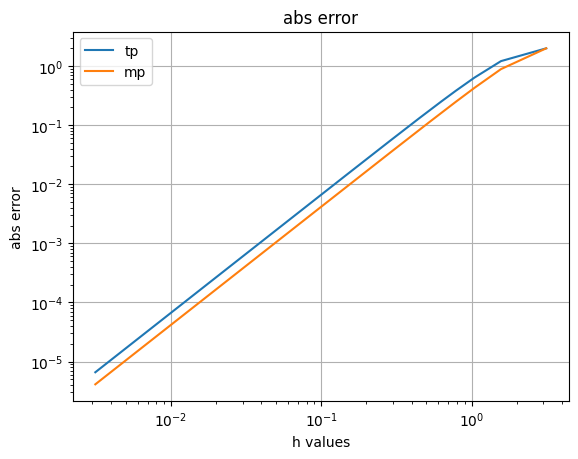

In [15]:
loglog(h_s, error_tp,label='tp')
loglog(h_s, error_mp,label='mp')

title('abs error')
xlabel('h values')
ylabel('abs error')

legend(['tp', 'mp'])
grid(True)
show()

In [16]:
# hh_s = [i**2 for i in h_s]
# plot(hh_s, tp_result)
# plot(hh_s, mp_result)
# legend(['tp', 'mp'])
# grid(True)
# show()

## Explanation for (1)
The midpoint method is a 1-point integration method because it approximates the area under the curve using rectangles. For each subinterval, the method takes the function's value at the midpoint and assumes that this value holds across the entire subinterval. This essentially creates a rectangle with height equal to the function's value at the midpoint and width equal to the subinterval's width. The area of this rectangle is taken as the approximation of the integral over that subinterval.
The trapezoid method, on the other hand, uses trapezoids to approximate the area. For each subinterval, it takes the function's value at both endpoints, creating a trapezoid whose area is calculated using the average of these two values for the height and the subinterval's width for the base. This accounts for the change in the function's value over the interval, making it a 2-point method.
Yet for both the rectangle and trapezoid are evaluating with the "same" area in a sense that the area of trapezoid under and above the rectangle is cancelled out. Thus, under a small interval, both method gives the same estimation.|

## Explanation for (2)
Indeed when we are talking about the error in terms of the interval ${x_i, x_{i + 1}}$. As shown in the formula, the error term is given by $\frac{h^3}{12}f^{''}(c)$, but when we are integral over $[a, b]$, we are summing over a lot of intervals, whose length is determined by $h$ ($\Delta x = \frac{(b - a)}{h}$). Thus, actually when we are evaluating over interval $[a, b]$, we are doing a summation:

\begin{align}
\int_{a}^{b} f(x) &= \sum_{i = 0}^{N - 1} (\frac{h}{2} \Delta x_i -\frac{h^3}{12}f^{''}(c_i)) \\
&= \sum_{i = 0}^{N - 1} (\frac{h}{2} \Delta x_i)  -\sum_{i = 0}^{N - 1}(\frac{h^3}{12}f^{''}(c_i)) \\
\end{align}

Where 

\begin{align}
\Delta x_i &= x_{i + 1} - x_i \\
x_i &= a + ih\\
h &= \frac{b - a}{N} \\
i &\in \{0, 1, 2, ... , N\} \\
c_i &\in [x_i, x_{i + 1}] \\
\end{align}

When take a closer look on the term $-\sum_{i = 0}^{N - 1}(\frac{h^3}{12}f^{''}(c_i))$
To analyze the error, we take an absolute value, then 
\begin{align}
|\sum_{i = 0}^{N - 1}(\frac{h^3}{12}f^{''}(c_i))| \leq |\sum_{i = 0}^{N - 1}h^3M_i| \leq |\sum_{i = 0}^{N - 1}h^3M|\leq |M||\sum_{i = 0}^{N - 1}h^3| = M|\sum_{i = 0}^{N - 1}h^3| = M\cdot N\cdot (\frac{b - a}{N})^3 = \frac{(b - a)^3}{N^2} = (b - a)h^2
\end{align}

where $\forall i, |f^{''}(c_i)| \lt M_i \lt M $.

Thus, we figured that the overall error term should be of the order $O(h^2)$

# Exercise 5

In [17]:
coe_dict = {
    2: [
        [-math.sqrt(1 / 3), 1.0],
        [math.sqrt(1 / 3), 1.0]
    ],
    3: [
        [-math.sqrt(3 / 5), 5/9],
        [0.0, 8/9],
        [math.sqrt(3 / 5), 5/9]
    ],
    4: [
        [(-(math.sqrt((15 + 2 * math.sqrt(30)) / 35))), (90 - 5* sqrt(30)) / 180],
        [(-(math.sqrt((15 - 2 * math.sqrt(30)) / 35))), (90 + 5* sqrt(30)) / 180],
        [((math.sqrt((15 - 2 * math.sqrt(30)) / 35))),  (90 + 5* sqrt(30)) / 180],
        [((math.sqrt((15 + 2 * math.sqrt(30)) / 35))),  (90 - 5* sqrt(30)) / 180]
    ]
}

In [18]:
coe_dict[4]

[[-0.8611363115940526, 0.34785484513745385],
 [-0.33998104358485626, 0.6521451548625462],
 [0.33998104358485626, 0.6521451548625462],
 [0.8611363115940526, 0.34785484513745385]]

In [19]:
def gq_integral_unscaled(f, n: int):
    para_list = coe_dict[n]
    s = 0.0
    for i in para_list:
        # print(f"selected parameter: {para_list}, n: {n}")
        curr_s = f(i[0]) * i[1]
        s += curr_s
    
    return s

In [20]:
gq_integral_unscaled(math.sin, 2) # passed

0.0

In [21]:
gq_integral_unscaled(math.cos, 4)

1.6829416886959736

Passed basic unit test cases

In [22]:
f_1 = lambda x: 1+2*x
f_2 = lambda x: f_1(x) + 3*(x**2)
f_3 = lambda x: f_2(x) + 4*(x**3)
f_4 = lambda x: f_3(x) + 5*(x**4)
f_5 = lambda x: f_4(x) + 6*(x**5)
f_6 = lambda x: f_5(x) + 7*(x**6)
f_7 = lambda x: f_6(x) + 8*(x**7)
f_list = [f_1, f_2, f_3, f_4, f_5, f_6, f_7]

In [23]:
test_r = [gq_integral_unscaled(each_f, 4) for each_f in f_list]

In [24]:
test_r

[2.0, 4.0, 3.9999999999999996, 6.0, 6.0, 7.999999999999999, 7.999999999999999]

In [25]:
def gq_integral_scaled(f, n: int, a: float, b: float):
    #         f_n = lambda x: ((x1-x0)/2) * f(((x1-x0)/2)*x +(x1+x0)/2)
    f_scaled = lambda t: ((b - a) / 2) * f(((b - a) / 2) * t + ((a + b) / 2)) # t: from -1 to 1 now
    # f_n = lambda x: ((b-a)/2) * f(((b-a)/2)*x +(b+a)/2)
    return gq_integral_unscaled(f = f_scaled, n = n)

In [26]:
gq_integral_scaled(math.cos, 4, -1, 1) # passed basic case

1.6829416886959736

The picture shows that the answer is correct

![correct answer](cos_int_answer.png)

In [27]:
test_r_2 = [gq_integral_scaled(each_f, 4, -1, 1) for each_f in f_list]

In [28]:
test_r_2

[2.0, 4.0, 3.9999999999999996, 6.0, 6.0, 7.999999999999999, 7.999999999999999]

In [29]:
gq_integral_scaled(math.sin, 4, 0, math.pi) # expected

1.9999842284577225

In [30]:
def gq_integral(f, n: int, a: float, b: float, N: int):
    integ = 0.0
    for i in range(0, N): # This is the final problem
        x_i      = float(a) +  (float(i)*     float((b - a) / N))
        x_i_next = float(a) + (float(i + 1)*float((b - a) / N))
        integ += float(gq_integral_scaled(f = f, 
                                    n = n,
                                    a = x_i,
                                    b = x_i_next))
    return integ

In [31]:
gq_integral(math.sin, 3, -math.pi, math.pi, N=1000)

-5.196885944584034e-16

In [32]:
def test_and_draw_graph(f, a: float, b: float, N_range:int, correct_answer:float):
    N_range_G_list = range(1, N_range + 1)
    n_2_test_result = [gq_integral(f, 2, float(a), float(b), N = i) for i in N_range_G_list]
    n_3_test_result = [gq_integral(f, 3, float(a), float(b), N = i) for i in N_range_G_list]
    n_4_test_result = [gq_integral(f, 4, float(a), float(b), N = i) for i in N_range_G_list]
    
    n_2_error = [fabs(correct_answer - j) for j in n_2_test_result]
    n_3_error = [fabs(correct_answer - j) for j in n_3_test_result]
    n_4_error = [fabs(correct_answer - j) for j in n_4_test_result]
    
    h_intevals = [((b - a) / i) for i in N_range_G_list]
    
    loglog(h_intevals, n_2_error)
    loglog(h_intevals, n_3_error)
    loglog(h_intevals, n_4_error)
    
    title('abs error')
    xlabel('h values')
    ylabel('abs error')

    legend(['n: 2', 'n: 3', 'n: 4'])
    grid(True)
    show()
    return n_4_test_result

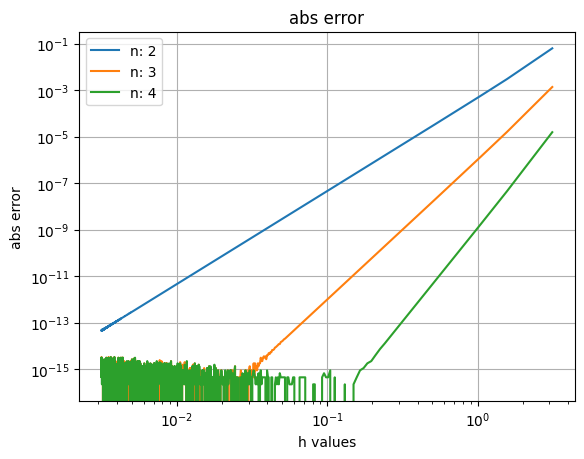

In [33]:
n_4_test_result = test_and_draw_graph(math.sin, a=0, b = math.pi, N_range = 1000, correct_answer = 2.0)
# From the graph below we can see from the slop of the line that they are producing the correct result